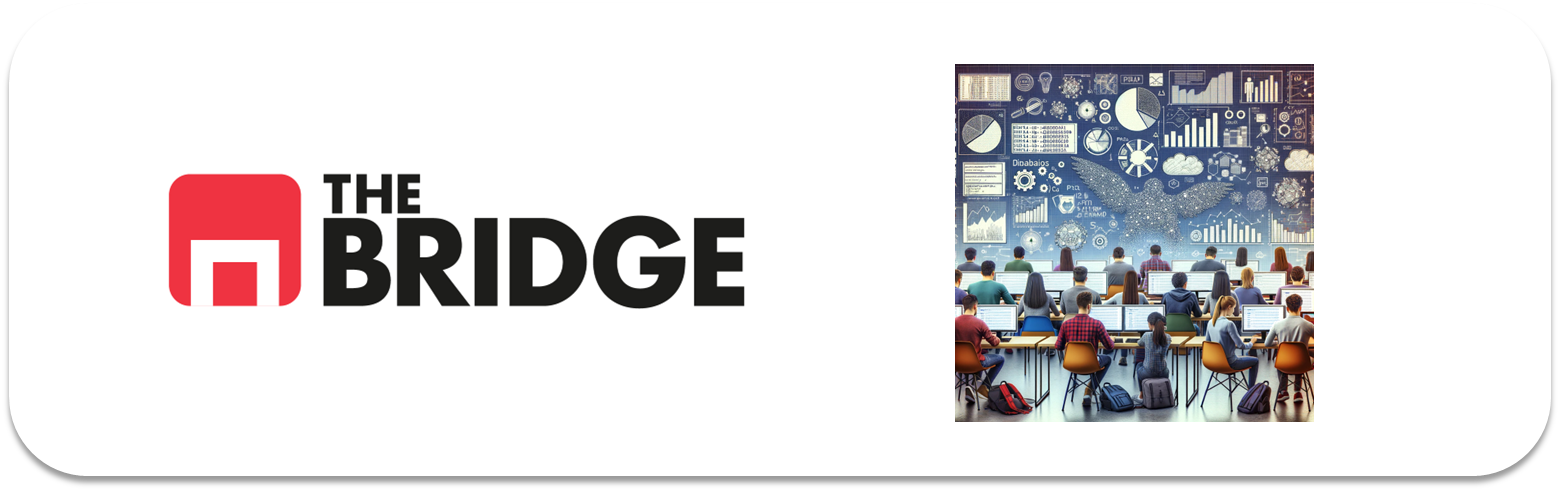

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [2]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import seaborn as sns

In [3]:
#1. Cargar el dataset
df= pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = '|')

In [4]:
df.head()
#son todas variables numericas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
#2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
target = 'MEDV'
# Se quiere predecir la mediana del precio de las casas en una zona del área metropolitana de Boston
#asi que el target serà la precio medio de las casas ocupadas
#Serà un modelo SUPERVISADO

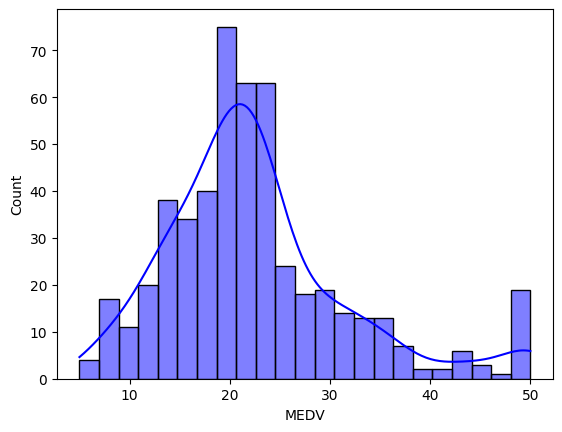

In [6]:
#miramos su distribucion
sns.histplot(df[target], color='Blue', kde = True)
plt.show()

Tiene una distribución en forma de campana de Gauss, una distribución normal, y por tanto eso es una buena señal para aplicar regresión lineal.
Aunque tiene un aumento de valores en la cola, unos capados - no se rapresentan valores superiores de 50k -

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
df.RAD.value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: count, dtype: int64

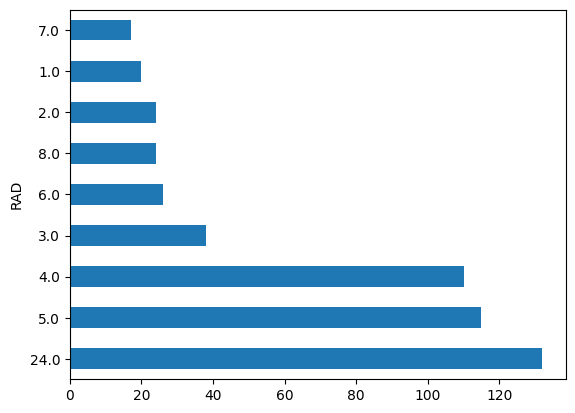

In [21]:
df.RAD.value_counts().plot.barh();

In [8]:
#3. Split en train y test
features = df.drop(target, axis=1).columns.tolist()
X = df[features]
y = df[target]
print(X.shape, y.shape)

(506, 12) (506,)


In [ ]:
#4. X,y de train y test
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [10]:
#5. Mini-EDA, selecciona las features que quieres quedarte y por qué.

In [26]:
#corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


In [25]:
# corr[target].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

PODEMOS TOMAR LA DECISION DE QUEDARNOS CON LAS QUE TIENEN MAS DE UN DETERMiNADO COEFF DE CORR

CUIDADO SI HAY VARIABLES CATEGORICAS QUE HAN SIDO TRANSFORMADAS A NUMERICA : PORQUE NO TIENE SENTIDO CALCULAR LA CORR DE PEARSON ENTRE VARIABLE CATEGORICAS Y NUMERICAS

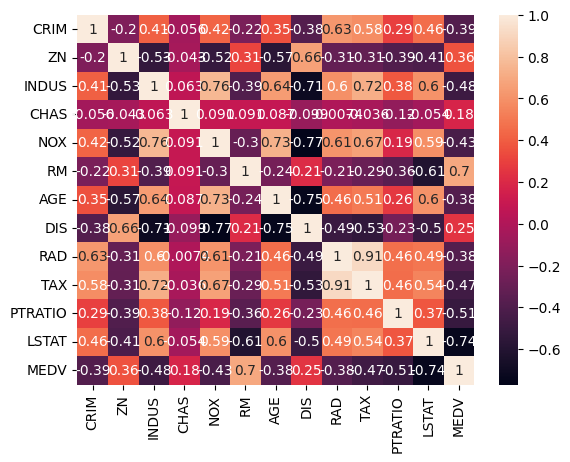

In [11]:
sns.heatmap(df.corr(),annot=True);
plt.show();

Las features mas correlacionadas son:
- RM : numero de habitaciones (0.7 correlacion negativa)
-LSTAT : tiene una alta correlacion negativa
RM y LSTAT tienen las correlaciones más significativas, siendo buenos predictores del valor de las viviendas.

Corr en variables
Variables como TAX, RAD, y DIS muestran relaciones interesantes entre sí, pero pueden necesitar una evaluación cuidadosa para su inclusión en modelos debido a su alta correlación mutua.
Variables con correlaciones fuertes entre ellas:

DIS (distancia a centros de empleo) y NOX (concentración de óxidos de nitrógeno): Tienen una correlación negativa fuerte (~-0.77). Esto sugiere que áreas más cercanas a centros de empleo tienen mayores niveles de contaminación por óxidos de nitrógeno.
TAX (tasa de impuestos) y RAD (accesibilidad a autopistas): Están altamente correlacionadas (~0.91). Esto puede deberse a factores de urbanización donde regiones más conectadas tienen tasas impositivas más altas.


In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
features = ['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX',
       'PTRATIO', 'LSTAT']

X_train = X_train[features]
X_train
X_test = X_test[features]
X_test

,CRIM,INDUS,NOX,RM,DIS,TAX,PTRATIO,LSTAT
173,0.09178,4.05,0.510,6.416,2.6463,296.0,16.6,9.04
274,0.05644,6.41,0.447,6.758,4.0776,254.0,17.6,3.53
491,0.10574,27.74,0.609,5.983,1.8681,711.0,20.1,18.07
72,0.09164,10.81,0.413,6.065,5.2873,305.0,19.2,5.52
452,5.09017,18.10,0.713,6.297,2.3682,666.0,20.2,17.27
...,...,...,...,...,...,...,...,...
412,18.81100,18.10,0.597,4.628,1.5539,666.0,20.2,34.37
436,14.42080,18.10,0.740,6.461,2.0026,666.0,20.2,18.05
411,14.05070,18.10,0.597,6.657,1.5275,666.0,20.2,21.22
86,0.05188,4.49,0.449,6.015,4.4272,247.0,18.5,12.86


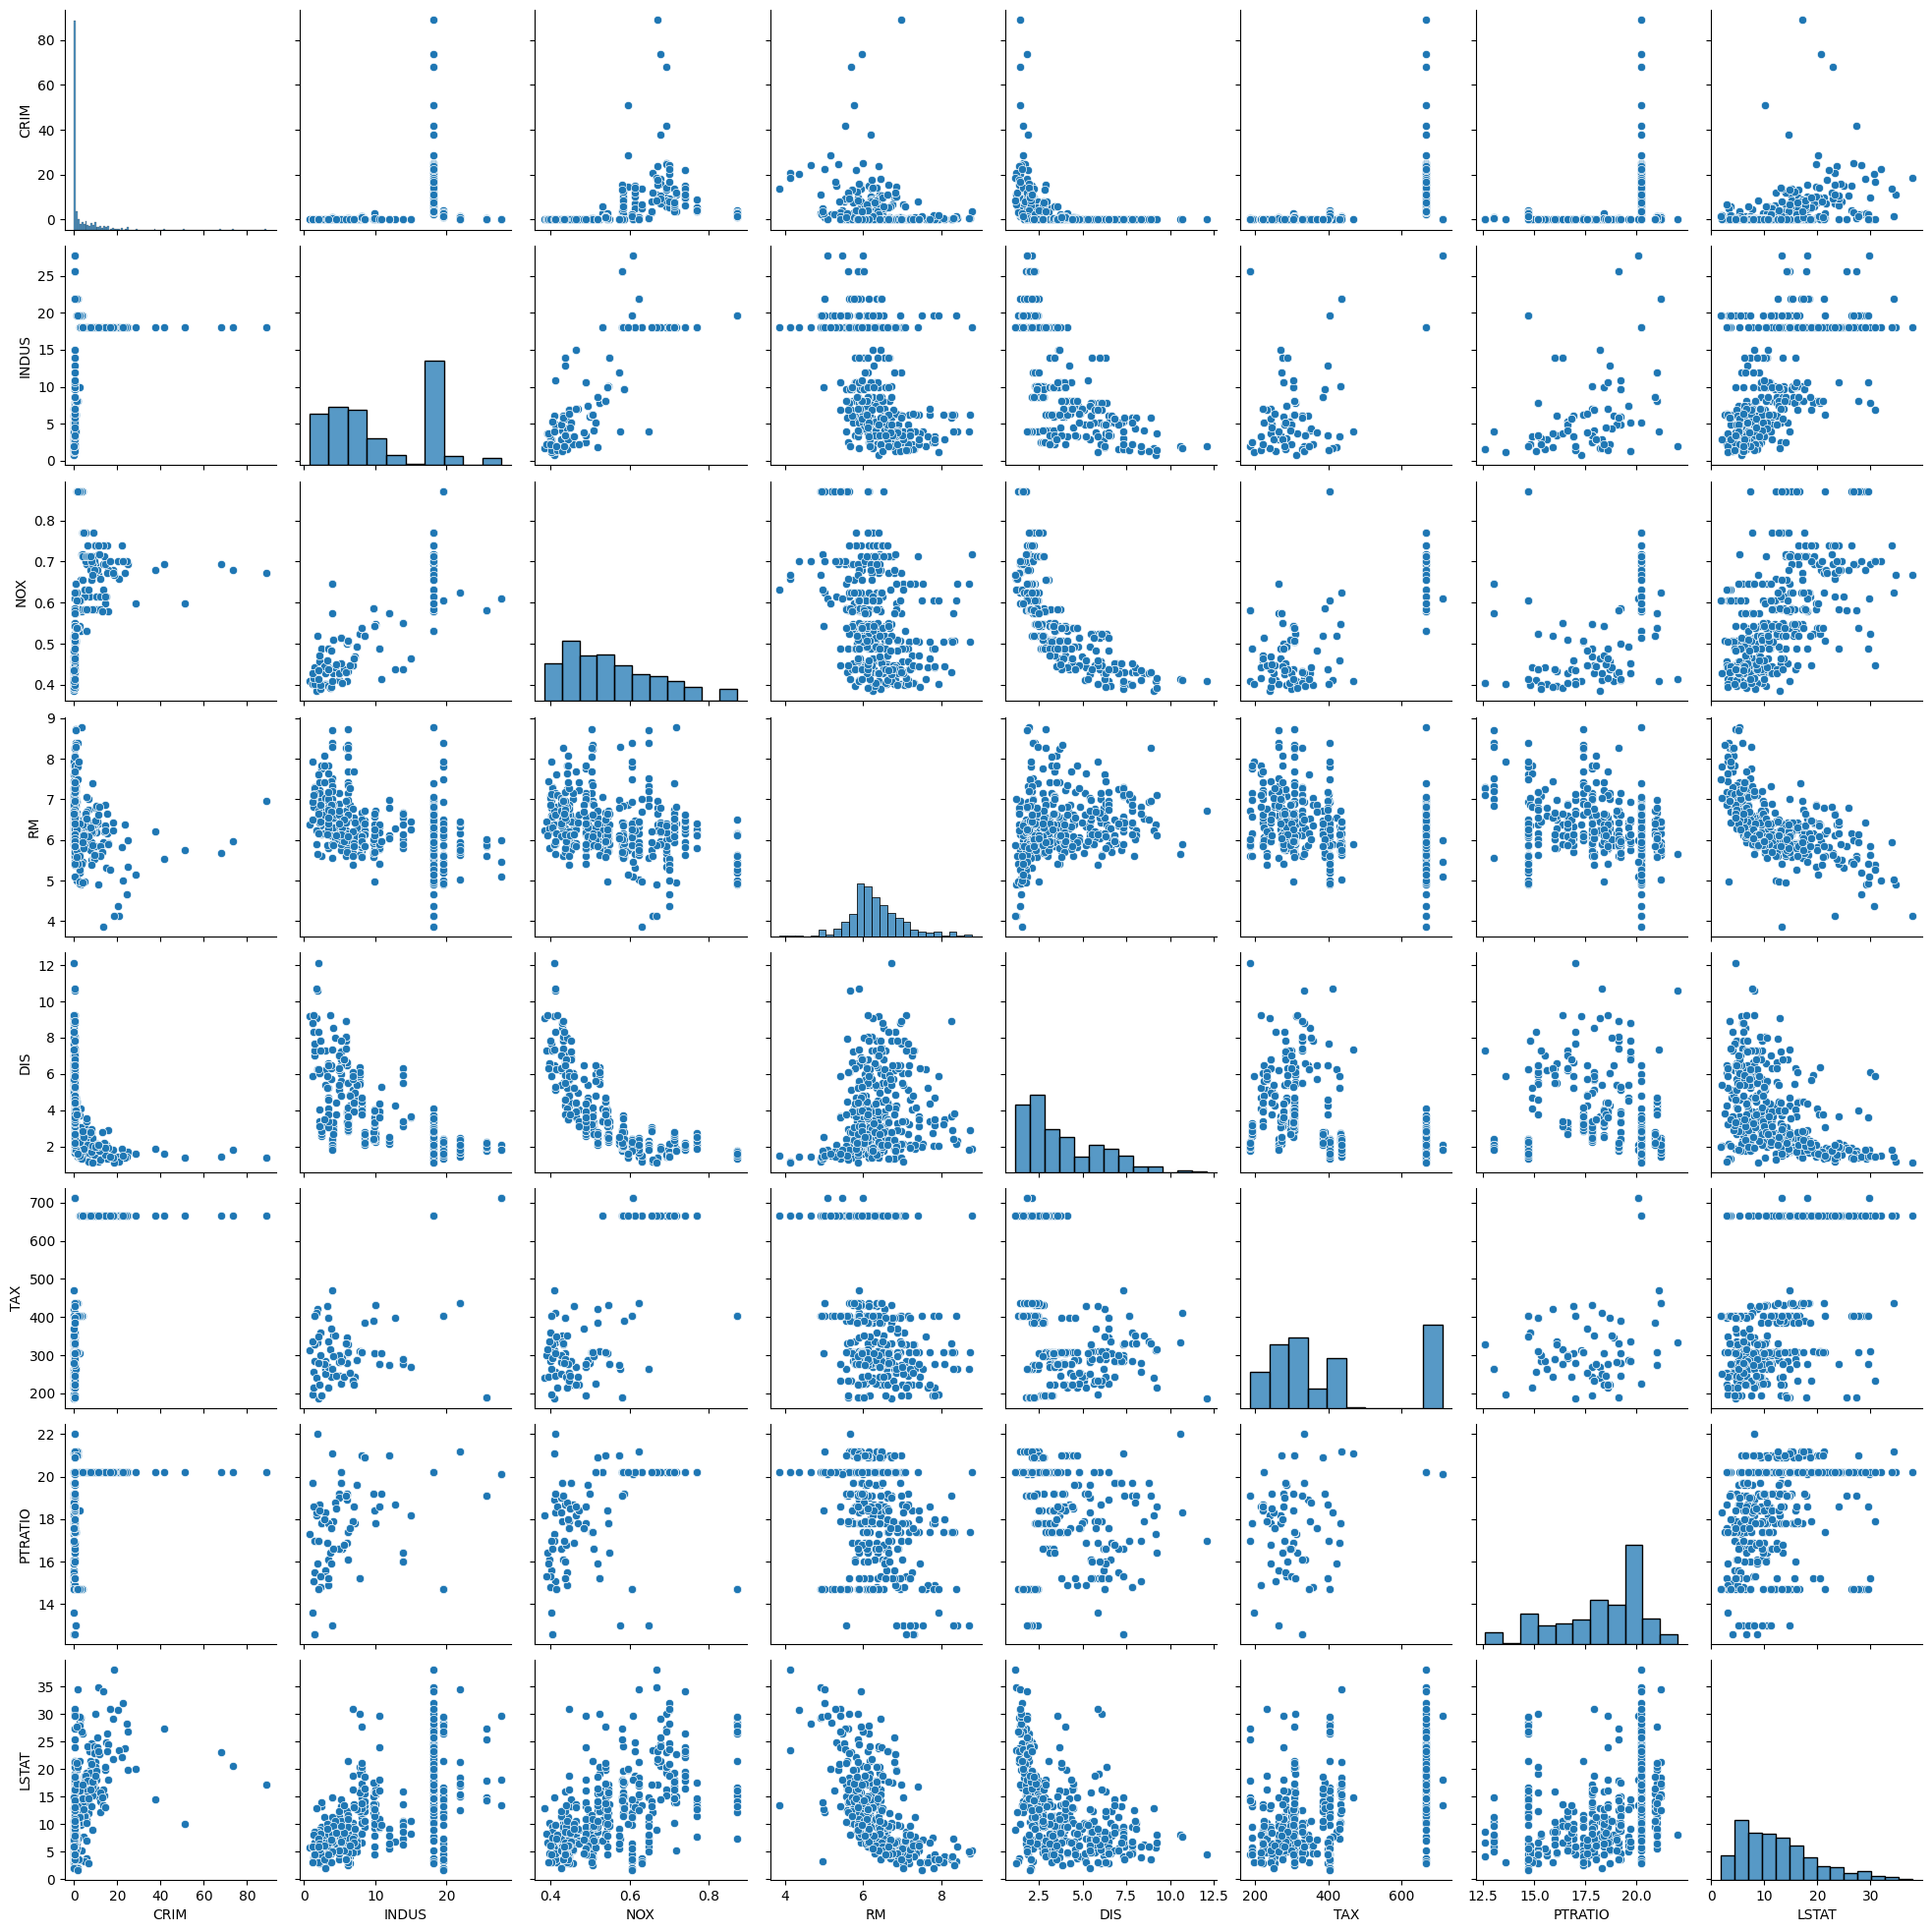

In [14]:
sns.pairplot(X_train[features]);

In [15]:
#6. Trata las variables para que funcionen lo mejor posible en el modelo.
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
#std_scaler.fit(train_set[features_num])

X_train = pd.DataFrame(std_scaler.fit_transform(X_train),columns = features)
X_test = pd.DataFrame(std_scaler.fit_transform(X_test),columns = features)


In [16]:
#7. Construye un modelo de regresión lineal
from sklearn.linear_model import LinearRegression #libreria para modelos de regresion linear


lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
#8. Analiza si lo crees conveniente los pesos y la importancia de las features.
lr.intercept_


np.float64(22.796534653465343)

In [28]:
lr.coef_

array([-0.88716525, -0.12087379, -1.92185316,  3.2820064 , -2.70420545,
        0.04795706, -2.05176726, -3.89655881])

In [18]:
coef_df = pd.DataFrame(lm.coef_, X_train.columns, 
                      columns=['Coefficient'])
coef_df

NameError: name 'lm' is not defined

In [ ]:
#9. Evalúa tu modelo. 
# Haz un pequeño assesmente de su generabilidad. 

y_pred = lr.predict(X_test)
pred_train = lr.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lr.score(X_train,y_train))

print('MAE Test', metrics.mean_absolute_error(y_test, y_pred))
print('MSE Test', metrics.mean_squared_error(y_test, y_pred))
print('RMSE Test', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Test', lr.score(X_test,y_test))


MAE train 3.478664014349979
MSE train 24.005123706456125
RMSE train 4.899502393759607
R2 train 0.7236769523545572
MAE Test 4.015324887526093
MSE Test 28.68318929891718
RMSE Test 5.35566889369733
R2 Test 0.6088679996747237


In [ ]:
# Compara gráficamente las predicciones con los valores reales.

In [30]:
#10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_reg = Ridge(alpha = 1000) # L2
lasso_reg = Lasso(alpha = 1000) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2
for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("MAE:", median_absolute_error(y_train, pred_train))
    print("RMSE:", root_mean_squared_error(y_train, pred_train))
    print("R^2:", lin_reg.score(X_train, y_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("MAE:", median_absolute_error(y_test, pred_test))
    print("RMSE:", root_mean_squared_error(y_test, pred_test))
    print("R^2:", lin_reg.score(X_test, y_test))

Modelo: Ridge
TRAIN:


NameError: name 'mean_absolute_error' is not defined

In [ ]:
#11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?
